In [242]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
plt.style.use('classic')
%matplotlib inline

In [243]:
# Microbenchmark Measurement Data

json_fc = np.loadtxt(fname = "./data/json/fc_setup.log")
json_kernel = np.loadtxt(fname = "./data/json/kernel.log")
json_init = np.loadtxt(fname = "./data/json/init.log")
json_python = np.loadtxt(fname = "./data/json/python.log")
json_import = np.loadtxt(fname = "./data/json/import.log")
json_app = np.loadtxt(fname = "./data/json/app.log")

base64_fc = np.loadtxt(fname = "./data/base64/fc_setup.log")
base64_kernel = np.loadtxt(fname = "./data/base64/kernel.log")
base64_init = np.loadtxt(fname = "./data/base64/init.log")
base64_python = np.loadtxt(fname = "./data/base64/python.log")
base64_import = np.loadtxt(fname = "./data/base64/import.log")
base64_app = np.loadtxt(fname = "./data/base64/app.log")

http_fc = np.loadtxt(fname = "./data/http/fc_setup.log")
http_kernel = np.loadtxt(fname = "./data/http/kernel.log")
http_init = np.loadtxt(fname = "./data/http/init.log")
http_python = np.loadtxt(fname = "./data/http/python.log")
http_import = np.loadtxt(fname = "./data/http/import.log")
http_app = np.loadtxt(fname = "./data/http/app.log")

primes_fc = np.loadtxt(fname = "./data/primes/fc_setup.log")
primes_kernel = np.loadtxt(fname = "./data/primes/kernel.log")
primes_init = np.loadtxt(fname = "./data/primes/init.log")
primes_python = np.loadtxt(fname = "./data/primes/python.log")
primes_import = np.loadtxt(fname = "./data/primes/import.log")
primes_app = np.loadtxt(fname = "./data/primes/app.log")

markdown2html_fc = np.loadtxt(fname = "./data/markdown2html/fc_setup.log")
markdown2html_kernel = np.loadtxt(fname = "./data/markdown2html/kernel.log")
markdown2html_init = np.loadtxt(fname = "./data/markdown2html/init.log")
markdown2html_python = np.loadtxt(fname = "./data/markdown2html/python.log")
markdown2html_import = np.loadtxt(fname = "./data/markdown2html/import.log")
markdown2html_app = np.loadtxt(fname = "./data/markdown2html/app.log")

sentiment_fc = np.loadtxt(fname = "./data/sentiment/fc_setup.log")
sentiment_kernel = np.loadtxt(fname = "./data/sentiment/kernel.log")
sentiment_init = np.loadtxt(fname = "./data/sentiment/init.log")
sentiment_python = np.loadtxt(fname = "./data/sentiment/python.log")
sentiment_import = np.loadtxt(fname = "./data/sentiment/import.log")
sentiment_app = np.loadtxt(fname = "./data/sentiment/app.log")

In [244]:
def check_size(fc_setup,kernel,init,py, im,app):
    assert(len(fc_setup)==len(kernel)==len(init)==len(py)==len(im)==len(app))

In [245]:
def preprocess(kernel,init,py, im,app):
    return kernel, init-kernel,  py-init, im-py,app-im

In [246]:
check_size(json_fc, json_kernel, json_init, json_python, json_import, json_app)
check_size(base64_fc, base64_kernel, base64_init, base64_python, base64_import, base64_app)
check_size(primes_fc, primes_kernel, primes_init, primes_python, primes_import, primes_app)
check_size(http_fc, http_kernel, http_init, http_python, http_import, http_app)
check_size(markdown2html_fc, markdown2html_kernel, markdown2html_init, markdown2html_python, markdown2html_import, markdown2html_app)
check_size(sentiment_fc, sentiment_kernel, sentiment_init, sentiment_python, sentiment_import, sentiment_app)

In [247]:
#json_app = json_app - json_import; json_import = json_import - json_unzip;json_unzip = json_unzip - json_init; json_init = json_init - json_kernel
(json_kernel, json_init, json_python, json_import, json_app) = preprocess(json_kernel, json_init, json_python, json_import, json_app)
(base64_kernel, base64_init, base64_python, base64_import, base64_app) = preprocess(base64_kernel, base64_init, base64_python, base64_import, base64_app)
(primes_kernel, primes_init, primes_python, primes_import, primes_app) = preprocess(primes_kernel, primes_init, primes_python, primes_import, primes_app)
(http_kernel, http_init, http_python, http_import, http_app) = preprocess(http_kernel, http_init, http_python, http_import, http_app)
(markdown2html_kernel, markdown2html_init, markdown2html_python, markdown2html_import, markdown2html_app) = preprocess(markdown2html_kernel, markdown2html_init, markdown2html_python, markdown2html_import, markdown2html_app)
(sentiment_kernel, sentiment_init, sentiment_python, sentiment_import, sentiment_app) = preprocess(sentiment_kernel, sentiment_init,  sentiment_python, sentiment_import, sentiment_app)

In [248]:
fave = np.array([np.mean(json_fc), np.mean(base64_fc), np.mean(http_fc), np.mean(primes_fc), np.mean(markdown2html_fc), np.mean(sentiment_fc)])
kave = np.array([np.mean(json_kernel), np.mean(base64_kernel), np.mean(http_kernel), np.mean(primes_kernel), np.mean(markdown2html_kernel), np.mean(sentiment_kernel)])
iave = np.array([np.mean(json_init), np.mean(base64_init), np.mean(http_init), np.mean(primes_init), np.mean(markdown2html_init), np.mean(sentiment_init)])
pave = np.array([np.mean(json_python), np.mean(base64_python), np.mean(http_python), np.mean(primes_python), np.mean(markdown2html_python), np.mean(sentiment_python)])
mave = np.array([np.mean(json_import), np.mean(base64_import), np.mean(http_import), np.mean(primes_import), np.mean(markdown2html_import), np.mean(sentiment_import)])
aave = np.array([np.mean(json_app), np.mean(base64_app), np.mean(http_app), np.mean(primes_app), np.mean(markdown2html_app), np.mean(sentiment_app)])

In [249]:
cwhite = '#fefaec'
ccyan = '#a9eee6'
cpurple = '#625772'
cred = '#f38181'
cgray = '#7A8B99'
cbrown = '#BEB7A4'

bar_width = 0.8
title_fz = 22
axis_fz = 18
tick_fz = 12

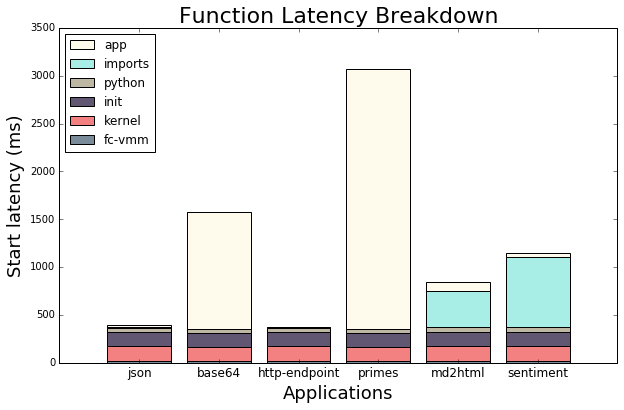

In [250]:
idx = ['json', 'base64','http-endpoint', 'primes', 'md2html','sentiment']
ind = [x for x, _ in enumerate(idx)]
plt.figure(figsize=(10,6))

plt.bar(ind, aave, width=bar_width, label = 'app', color = cwhite, bottom = mave++pave+iave+kave+fave)
plt.bar(ind, mave, width=bar_width, label = 'imports', color = ccyan, bottom = pave+iave+kave+fave)
plt.bar(ind, pave, width=bar_width, label = 'python', color = cbrown, bottom = iave+kave+fave)
plt.bar(ind, iave, width=bar_width, label = 'init', color = cpurple, bottom = kave+fave)
plt.bar(ind, kave, width=bar_width, label = 'kernel', color = cred, bottom = fave)
plt.bar(ind, fave, width=bar_width, label = 'fc-vmm', color = cgray)
plt.xticks(ind, idx, fontsize=tick_fz)
plt.ylabel("Start latency (ms)", fontsize=axis_fz)
plt.xlabel("Applications", fontsize=axis_fz)
plt.legend(loc = "upper left")
plt.title("Function Latency Breakdown", fontsize=title_fz)

plt.show()

### Aggregate results for system setup stages (i.e., fc-vmm, kernel and init):

In [251]:
fc_all = np.concatenate((json_fc, base64_fc, http_fc, primes_fc, markdown2html_fc, sentiment_fc), axis=0)
kernel_all = np.concatenate((json_kernel, base64_kernel, http_kernel, primes_kernel, markdown2html_kernel, sentiment_kernel), axis=0)
init_all = np.concatenate((json_init, base64_init, http_init, primes_init, markdown2html_init, sentiment_init), axis=0)
python_all = np.concatenate((json_python, base64_python, http_python, primes_python, markdown2html_python, sentiment_python), axis=0)

In [252]:
sys_setup_avg = np.array([np.mean(fc_all), np.mean(kernel_all), np.mean(init_all), np.mean(python_all)])

In [253]:
sys_setup_std = np.array([np.std(fc_all), np.std(kernel_all), np.std(init_all), np.std(python_all)])

In [256]:
sys_setup_avg

array([ 16.3942953 , 155.59395973, 146.76174497,  46.06879195])

In [255]:
sys_setup_std

array([2.86272639, 6.14775267, 6.32457758, 8.00903218])

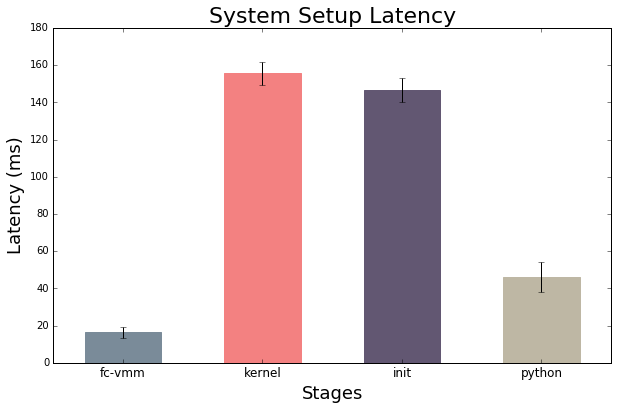

In [254]:
bar_width = 0.55
idx = ['fc-vmm', 'kernel', 'init', 'python']
ind = [x for x, _ in enumerate(idx)]
plt.figure(figsize=(10,6))

bars = plt.bar(ind, sys_setup_avg, yerr=sys_setup_std, width=bar_width)
bars[0].set_color(cgray)
bars[1].set_color(cred)
bars[2].set_color(cpurple)
bars[3].set_color(cbrown)
plt.xticks(ind, idx, fontsize=tick_fz)
plt.ylabel("Latency (ms)", fontsize=axis_fz)
plt.xlabel("Stages", fontsize=axis_fz)
plt.title("System Setup Latency", fontsize=title_fz)

plt.show()